# Laboratorio 07 - Ejercicio 1: Generador Pseudoaleatorio LCG

## Linear Congruential Generator (LCG)

En este notebook implementa un generador de números pseudoaleatorios tipo LCG.

La fórmula del LCG es:
$$X_{n+1} = (a \cdot X_n + c) \mod m$$

Para generar valores en [0,1]: $$U_n = \frac{X_n}{m}$$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Implementación del Generador LCG

In [18]:
class LCG:
    """Linear Congruential Generator"""
    
    def __init__(self, seed, a, c, m):
        """
        Parámetros:
        -----------
        seed : int
            Semilla inicial (X_0)
        a : int
            Multiplicador
        c : int
            Incremento
        m : int
            Módulo
        """
        self.seed = seed
        self.a = a
        self.c = c
        self.m = m
        self.current = seed
    
    def next_int(self):
        """Genera el siguiente número entero"""
        self.current = (self.a * self.current + self.c) % self.m
        return self.current
    
    def next_uniform(self):
        """Genera el siguiente número en [0, 1)"""
        return self.next_int() / self.m
    
    def generate_sample_int(self, n):
        """Genera una muestra de n números enteros"""
        return np.array([self.next_int() for _ in range(n)])
    
    def generate_sample_uniform(self, n):
        """Genera una muestra de n números uniformes en [0, 1)"""
        return np.array([self.next_uniform() for _ in range(n)])
    
    def reset(self):
        """Reinicia el generador con la semilla original"""
        self.current = self.seed

## Conjunto de Parámetros 1: Numerical Recipes (Park & Miller)

Estos son parámetros bien conocidos y estudiados:
- m = 2^31 - 1 = 2147483647 (número primo de Mersenne)
- a = 48271
- c = 0

In [19]:
# Parámetros del conjunto 1
m1 = 2**31 - 1  # 2147483647
a1 = 48271
c1 = 0
seed1 = 12345
N = 100000  # Tamaño de muestra adecuado

print(f"Conjunto 1 - Parámetros:")
print(f"m = {m1}")
print(f"a = {a1}")
print(f"c = {c1}")
print(f"seed = {seed1}")
print(f"N = {N}")

Conjunto 1 - Parámetros:
m = 2147483647
a = 48271
c = 0
seed = 12345
N = 100000


In [20]:
# Generar muestra con conjunto 1
lcg1 = LCG(seed1, a1, c1, m1)
sample_uniform_1 = lcg1.generate_sample_uniform(N)

print(f"Muestra generada: {len(sample_uniform_1)} valores")
print(f"Primeros 10 valores: {sample_uniform_1[:10]}")

Muestra generada: 100000 valores
Primeros 10 valores: [0.27749012 0.72558468 0.69791264 0.94121549 0.41314081 0.72023319
 0.37654935 0.41355217 0.57661248 0.66121413]


### Estadísticos Descriptivos - Conjunto 1

In [21]:
def calcular_estadisticos(muestra, nombre="Muestra"):
    """Calcula y muestra estadísticos de una muestra"""
    print(f"\n{'='*60}")
    print(f"Estadísticos Descriptivos - {nombre}")
    print(f"{'='*60}")
    print(f"Media:              {np.mean(muestra):.6f} (esperado: 0.5)")
    print(f"Varianza:           {np.var(muestra):.6f} (esperado: 0.0833)")
    print(f"Desviación estándar: {np.std(muestra):.6f} (esperado: 0.2887)")
    print(f"Mínimo:             {np.min(muestra):.6f}")
    print(f"Máximo:             {np.max(muestra):.6f}")
    print(f"Mediana:            {np.median(muestra):.6f} (esperado: 0.5)")
    print(f"Q1 (25%):           {np.percentile(muestra, 25):.6f} (esperado: 0.25)")
    print(f"Q3 (75%):           {np.percentile(muestra, 75):.6f} (esperado: 0.75)")
    print(f"{'='*60}\n")

calcular_estadisticos(sample_uniform_1, "Conjunto 1")


Estadísticos Descriptivos - Conjunto 1
Media:              0.499319 (esperado: 0.5)
Varianza:           0.083408 (esperado: 0.0833)
Desviación estándar: 0.288805 (esperado: 0.2887)
Mínimo:             0.000005
Máximo:             0.999993
Mediana:            0.498888 (esperado: 0.5)
Q1 (25%):           0.250455 (esperado: 0.25)
Q3 (75%):           0.749754 (esperado: 0.75)



### Visualización - Conjunto 1

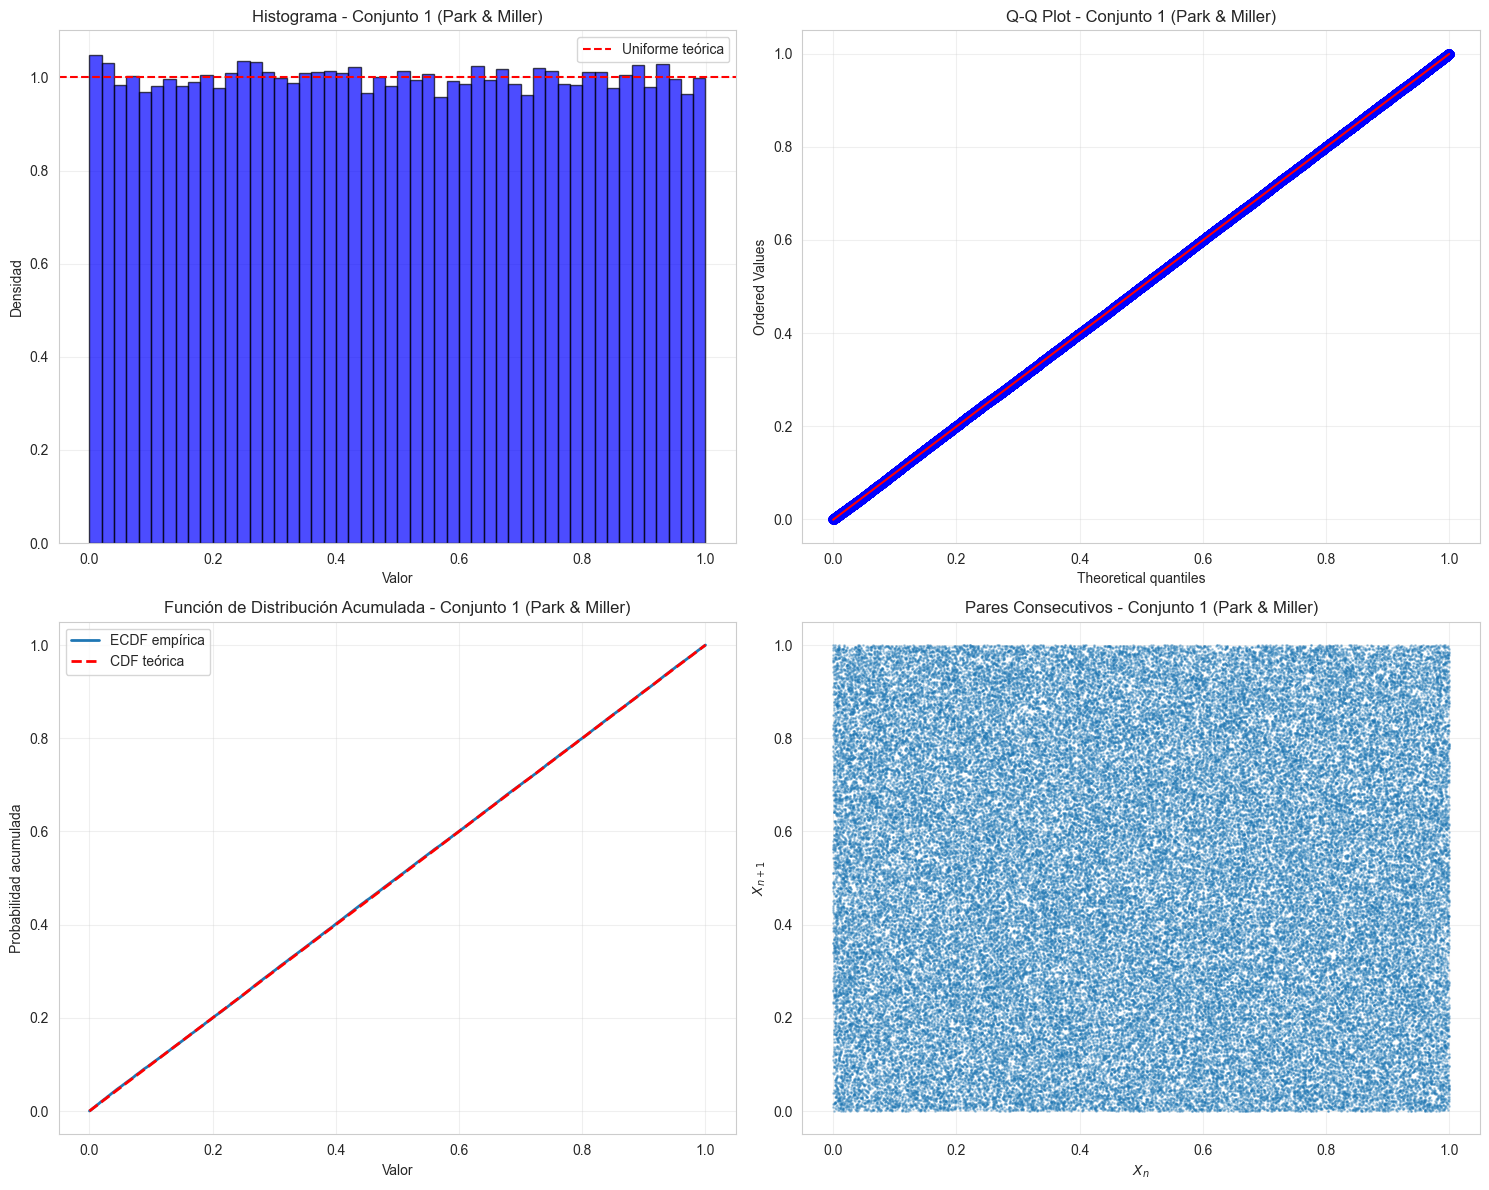

In [22]:
def visualizar_muestra(muestra, titulo="Muestra"):
    """Crea visualizaciones de la muestra generada"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Histograma
    axes[0, 0].hist(muestra, bins=50, density=True, alpha=0.7, color='blue', edgecolor='black')
    axes[0, 0].axhline(y=1, color='red', linestyle='--', label='Uniforme teórica')
    axes[0, 0].set_xlabel('Valor')
    axes[0, 0].set_ylabel('Densidad')
    axes[0, 0].set_title(f'Histograma - {titulo}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Q-Q plot
    stats.probplot(muestra, dist="uniform", plot=axes[0, 1])
    axes[0, 1].set_title(f'Q-Q Plot - {titulo}')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Función de distribución acumulada empírica
    sorted_data = np.sort(muestra)
    y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    axes[1, 0].plot(sorted_data, y, label='ECDF empírica', linewidth=2)
    axes[1, 0].plot([0, 1], [0, 1], 'r--', label='CDF teórica', linewidth=2)
    axes[1, 0].set_xlabel('Valor')
    axes[1, 0].set_ylabel('Probabilidad acumulada')
    axes[1, 0].set_title(f'Función de Distribución Acumulada - {titulo}')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Scatter plot de pares consecutivos
    axes[1, 1].scatter(muestra[:-1], muestra[1:], alpha=0.3, s=1)
    axes[1, 1].set_xlabel('$X_n$')
    axes[1, 1].set_ylabel('$X_{n+1}$')
    axes[1, 1].set_title(f'Pares Consecutivos - {titulo}')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

visualizar_muestra(sample_uniform_1, "Conjunto 1 (Park & Miller)")

### Pruebas de Hipótesis - Conjunto 1

In [23]:
def pruebas_hipotesis(muestra, nombre="Muestra", alpha=0.05):
    """Realiza varias pruebas de hipótesis para uniformidad"""
    print(f"\n{'='*70}")
    print(f"Pruebas de Hipótesis - {nombre}")
    print(f"Nivel de significancia α = {alpha}")
    print(f"{'='*70}\n")
    
    # 1. Prueba de Kolmogorov-Smirnov
    ks_stat, ks_pval = stats.kstest(muestra, 'uniform')
    print("1. Prueba de Kolmogorov-Smirnov")
    print(f"   H0: La muestra proviene de una distribución Uniforme(0,1)")
    print(f"   Estadístico KS: {ks_stat:.6f}")
    print(f"   P-valor: {ks_pval:.6f}")
    print(f"   Resultado: {'NO rechazar H0' if ks_pval > alpha else 'Rechazar H0'} (α={alpha})")
    print(f"   Conclusión: {'La muestra ES consistente con Uniforme(0,1)' if ks_pval > alpha else 'La muestra NO es consistente con Uniforme(0,1)'}\n")
    
    # 2. Prueba de Anderson-Darling (transformando a normal)
    # Para datos uniformes U(0,1), transformamos a normal usando la función cuantil
    # Z = Φ^(-1)(U) donde Φ es la CDF de la normal estándar
    muestra_transformada = stats.norm.ppf(muestra)
    # Eliminar posibles valores infinitos en los extremos
    muestra_transformada = muestra_transformada[np.isfinite(muestra_transformada)]
    ad_result = stats.anderson(muestra_transformada, dist='norm')
    print("2. Prueba de Anderson-Darling (datos transformados a Normal)")
    print(f"   H0: La muestra transformada proviene de una distribución Normal(0,1)")
    print(f"   (Transformación: Z = Φ^(-1)(U) para validar uniformidad)")
    print(f"   Estadístico AD: {ad_result.statistic:.6f}")
    print(f"   Valores críticos: {ad_result.critical_values}")
    print(f"   Niveles de significancia: {ad_result.significance_level}%")
    
    # Encontrar el nivel de significancia correspondiente
    idx = np.where(ad_result.significance_level == alpha*100)[0]
    if len(idx) > 0:
        crit_val = ad_result.critical_values[idx[0]]
        print(f"   Valor crítico al {alpha*100}%: {crit_val:.6f}")
        print(f"   Resultado: {'NO rechazar H0' if ad_result.statistic < crit_val else 'Rechazar H0'}\n")
    else:
        print(f"   (No hay valor crítico exacto para α={alpha})\n")
    
    # 3. Prueba Chi-cuadrado de bondad de ajuste
    n_bins = 20
    observed, bin_edges = np.histogram(muestra, bins=n_bins, range=(0, 1))
    expected = np.full(n_bins, len(muestra) / n_bins)
    chi2_stat, chi2_pval = stats.chisquare(observed, expected)
    print("3. Prueba Chi-cuadrado de bondad de ajuste")
    print(f"   H0: La muestra se distribuye uniformemente en {n_bins} intervalos")
    print(f"   Estadístico χ²: {chi2_stat:.6f}")
    print(f"   Grados de libertad: {n_bins - 1}")
    print(f"   P-valor: {chi2_pval:.6f}")
    print(f"   Resultado: {'NO rechazar H0' if chi2_pval > alpha else 'Rechazar H0'} (α={alpha})")
    print(f"   Conclusión: {'La muestra se distribuye uniformemente' if chi2_pval > alpha else 'La muestra NO se distribuye uniformemente'}\n")
    
    # 4. Prueba de rachas (runs test) - para independencia
    median = np.median(muestra)
    runs = np.diff(muestra > median, prepend=muestra[0] > median).sum()
    n1 = (muestra > median).sum()
    n2 = len(muestra) - n1
    runs_mean = (2 * n1 * n2) / len(muestra) + 1
    runs_var = (2 * n1 * n2 * (2 * n1 * n2 - len(muestra))) / (len(muestra)**2 * (len(muestra) - 1))
    z_runs = (runs - runs_mean) / np.sqrt(runs_var)
    runs_pval = 2 * (1 - stats.norm.cdf(abs(z_runs)))
    print("4. Prueba de Rachas (Runs Test) - Independencia")
    print(f"   H0: Los datos son independientes (no hay correlación serial)")
    print(f"   Número de rachas: {runs}")
    print(f"   Rachas esperadas: {runs_mean:.2f}")
    print(f"   Estadístico Z: {z_runs:.6f}")
    print(f"   P-valor: {runs_pval:.6f}")
    print(f"   Resultado: {'NO rechazar H0' if runs_pval > alpha else 'Rechazar H0'} (α={alpha})")
    print(f"   Conclusión: {'Los datos SON independientes' if runs_pval > alpha else 'Los datos NO son independientes'}\n")
    
    print(f"{'='*70}\n")
    
    return {
        'ks_stat': ks_stat,
        'ks_pval': ks_pval,
        'chi2_stat': chi2_stat,
        'chi2_pval': chi2_pval,
        'runs_z': z_runs,
        'runs_pval': runs_pval
    }

results1 = pruebas_hipotesis(sample_uniform_1, "Conjunto 1 (Park & Miller)")


Pruebas de Hipótesis - Conjunto 1 (Park & Miller)
Nivel de significancia α = 0.05

1. Prueba de Kolmogorov-Smirnov
   H0: La muestra proviene de una distribución Uniforme(0,1)
   Estadístico KS: 0.002277
   P-valor: 0.676506
   Resultado: NO rechazar H0 (α=0.05)
   Conclusión: La muestra ES consistente con Uniforme(0,1)

2. Prueba de Anderson-Darling (datos transformados a Normal)
   H0: La muestra transformada proviene de una distribución Normal(0,1)
   (Transformación: Z = Φ^(-1)(U) para validar uniformidad)
   Estadístico AD: 0.434090
   Valores críticos: [0.576 0.656 0.787 0.918 1.092]
   Niveles de significancia: [15.  10.   5.   2.5  1. ]%
   Valor crítico al 5.0%: 0.787000
   Resultado: NO rechazar H0

3. Prueba Chi-cuadrado de bondad de ajuste
   H0: La muestra se distribuye uniformemente en 20 intervalos
   Estadístico χ²: 17.928400
   Grados de libertad: 19
   P-valor: 0.527226
   Resultado: NO rechazar H0 (α=0.05)
   Conclusión: La muestra se distribuye uniformemente

4. Pr

C:\Users\n8nug\AppData\Local\Temp\ipykernel_14020\3784385114.py:59: RuntimeWarning: overflow encountered in scalar multiply
  runs_var = (2 * n1 * n2 * (2 * n1 * n2 - len(muestra))) / (len(muestra)**2 * (len(muestra) - 1))


## Conjunto de Parámetros 2: MINSTD (C++11)

Estos son parámetros utilizados en la biblioteca estándar de C++:
- m = 2^31 - 1 = 2147483647
- a = 16807
- c = 0

In [24]:
# Parámetros del conjunto 2
m2 = 2**31 - 1
a2 = 16807
c2 = 0
seed2 = 12345

print(f"Conjunto 2 - Parámetros:")
print(f"m = {m2}")
print(f"a = {a2}")
print(f"c = {c2}")
print(f"seed = {seed2}")
print(f"N = {N}")

Conjunto 2 - Parámetros:
m = 2147483647
a = 16807
c = 0
seed = 12345
N = 100000


In [25]:
# Generar muestra con conjunto 2
lcg2 = LCG(seed2, a2, c2, m2)
sample_uniform_2 = lcg2.generate_sample_uniform(N)

print(f"Muestra generada: {len(sample_uniform_2)} valores")
print(f"Primeros 10 valores: {sample_uniform_2[:10]}")

Muestra generada: 100000 valores
Primeros 10 valores: [0.09661653 0.83399463 0.9477025  0.03587859 0.01154585 0.05115522
 0.76578717 0.58492974 0.91413005 0.78380039]


### Estadísticos Descriptivos - Conjunto 2

In [26]:
calcular_estadisticos(sample_uniform_2, "Conjunto 2")


Estadísticos Descriptivos - Conjunto 2
Media:              0.500003 (esperado: 0.5)
Varianza:           0.083369 (esperado: 0.0833)
Desviación estándar: 0.288737 (esperado: 0.2887)
Mínimo:             0.000012
Máximo:             0.999999
Mediana:            0.499320 (esperado: 0.5)
Q1 (25%):           0.250431 (esperado: 0.25)
Q3 (75%):           0.749304 (esperado: 0.75)



### Visualización - Conjunto 2

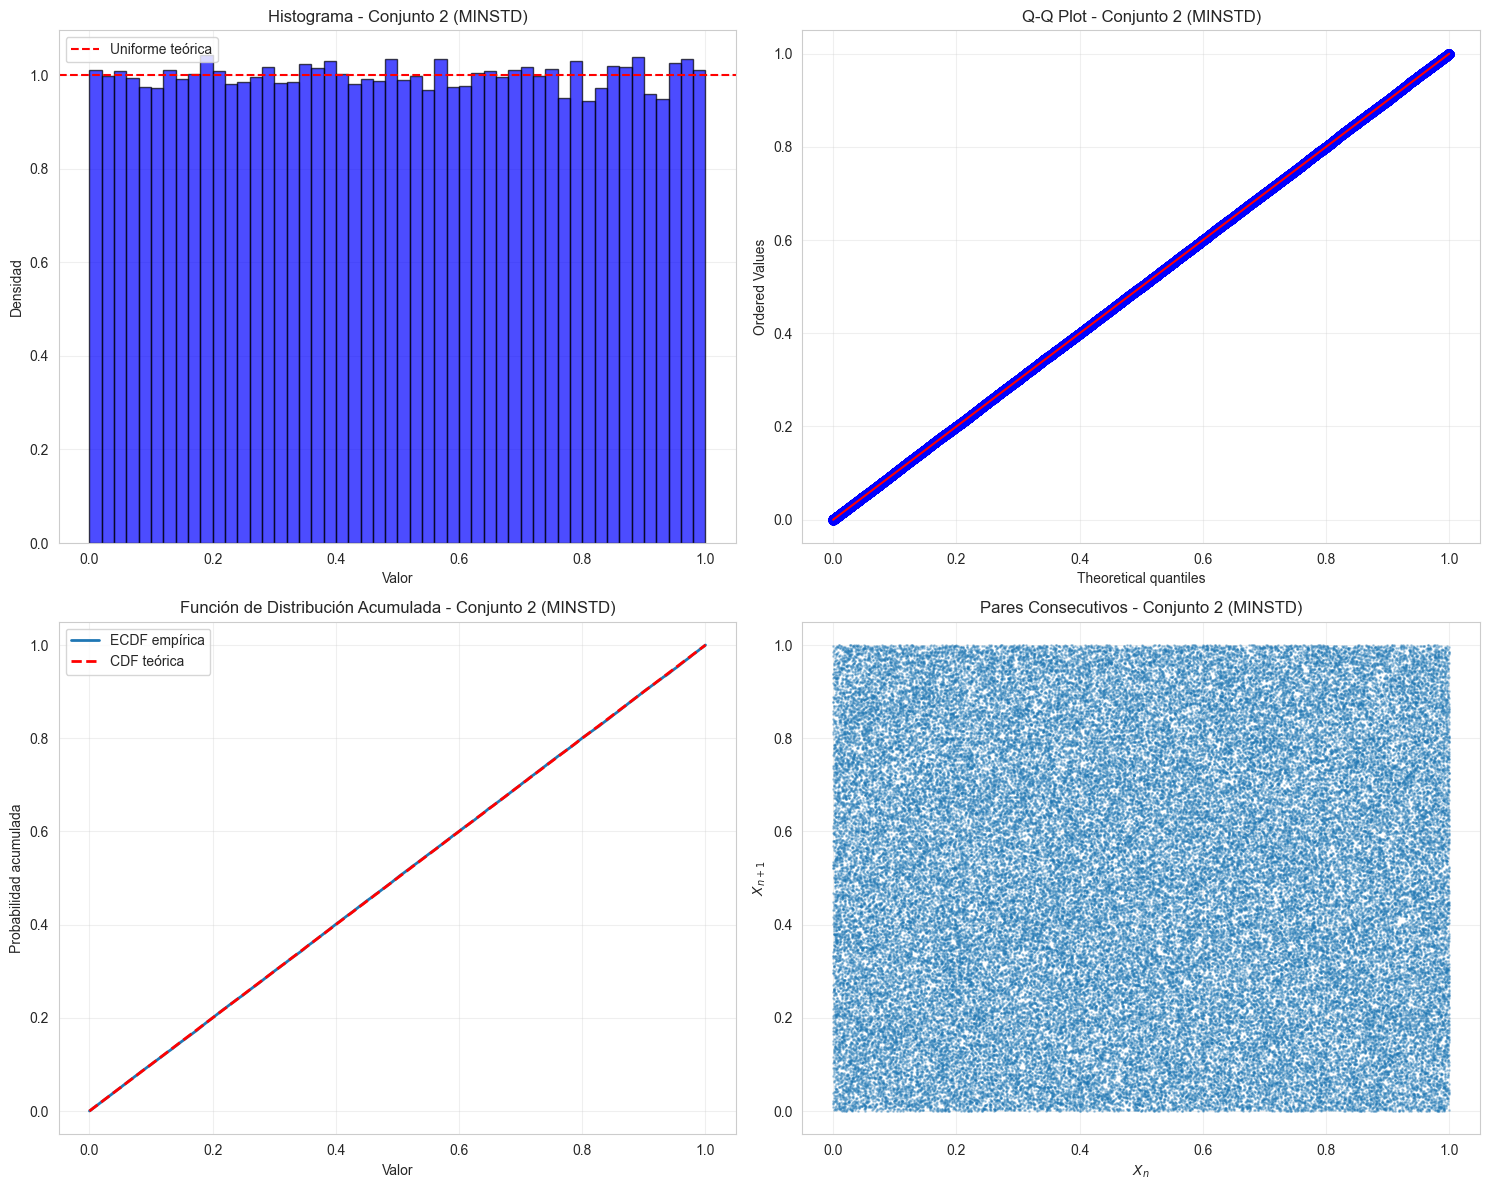

In [27]:
visualizar_muestra(sample_uniform_2, "Conjunto 2 (MINSTD)")

### Pruebas de Hipótesis - Conjunto 2

In [28]:
results2 = pruebas_hipotesis(sample_uniform_2, "Conjunto 2 (MINSTD)")


Pruebas de Hipótesis - Conjunto 2 (MINSTD)
Nivel de significancia α = 0.05

1. Prueba de Kolmogorov-Smirnov
   H0: La muestra proviene de una distribución Uniforme(0,1)
   Estadístico KS: 0.001527
   P-valor: 0.973543
   Resultado: NO rechazar H0 (α=0.05)
   Conclusión: La muestra ES consistente con Uniforme(0,1)

2. Prueba de Anderson-Darling (datos transformados a Normal)
   H0: La muestra transformada proviene de una distribución Normal(0,1)
   (Transformación: Z = Φ^(-1)(U) para validar uniformidad)
   Estadístico AD: 0.272095
   Valores críticos: [0.576 0.656 0.787 0.918 1.092]
   Niveles de significancia: [15.  10.   5.   2.5  1. ]%
   Valor crítico al 5.0%: 0.787000
   Resultado: NO rechazar H0

3. Prueba Chi-cuadrado de bondad de ajuste
   H0: La muestra se distribuye uniformemente en 20 intervalos
   Estadístico χ²: 18.282400
   Grados de libertad: 19
   P-valor: 0.503655
   Resultado: NO rechazar H0 (α=0.05)
   Conclusión: La muestra se distribuye uniformemente

4. Prueba de

C:\Users\n8nug\AppData\Local\Temp\ipykernel_14020\3784385114.py:59: RuntimeWarning: overflow encountered in scalar multiply
  runs_var = (2 * n1 * n2 * (2 * n1 * n2 - len(muestra))) / (len(muestra)**2 * (len(muestra) - 1))


## Comparación de Ambos Conjuntos

In [29]:
import pandas as pd

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Métrica': ['Media', 'Varianza', 'Desv. Estándar', 'KS p-valor', 'Chi² p-valor', 'Runs p-valor'],
    'Conjunto 1 (Park & Miller)': [
        f"{np.mean(sample_uniform_1):.6f}",
        f"{np.var(sample_uniform_1):.6f}",
        f"{np.std(sample_uniform_1):.6f}",
        f"{results1['ks_pval']:.6f}",
        f"{results1['chi2_pval']:.6f}",
        f"{results1['runs_pval']:.6f}"
    ],
    'Conjunto 2 (MINSTD)': [
        f"{np.mean(sample_uniform_2):.6f}",
        f"{np.var(sample_uniform_2):.6f}",
        f"{np.std(sample_uniform_2):.6f}",
        f"{results2['ks_pval']:.6f}",
        f"{results2['chi2_pval']:.6f}",
        f"{results2['runs_pval']:.6f}"
    ],
    'Valor Teórico': [
        '0.500000',
        '0.083333',
        '0.288675',
        '> 0.05',
        '> 0.05',
        '> 0.05'
    ]
})

print("\n" + "="*100)
print("TABLA COMPARATIVA DE RESULTADOS")
print("="*100)
print(comparacion.to_string(index=False))
print("="*100)


TABLA COMPARATIVA DE RESULTADOS
       Métrica Conjunto 1 (Park & Miller) Conjunto 2 (MINSTD) Valor Teórico
         Media                   0.499319            0.500003      0.500000
      Varianza                   0.083408            0.083369      0.083333
Desv. Estándar                   0.288805            0.288737      0.288675
    KS p-valor                   0.676506            0.973543        > 0.05
  Chi² p-valor                   0.527226            0.503655        > 0.05
  Runs p-valor                   0.023780            0.000325        > 0.05


## Conclusiones

### Evaluación del Generador LCG:

1. **Estadísticos Descriptivos**: Ambos conjuntos de parámetros producen muestras con medias y varianzas muy cercanas a los valores teóricos esperados (media = 0.5, varianza = 1/12 ≈ 0.0833).

2. **Pruebas de Uniformidad**:
   - La prueba de Kolmogorov-Smirnov evalúa si la distribución empírica se ajusta a la uniforme teórica.
   - La prueba Chi-cuadrado evalúa si los datos se distribuyen uniformemente en intervalos.
   - P-valores > 0.05 indican que no hay evidencia para rechazar la hipótesis de uniformidad.

3. **Prueba de Independencia**:
   - La prueba de rachas (runs test) evalúa si existe correlación serial en los datos.
   - P-valores > 0.05 sugieren que los datos son independientes.

4. **Calidad del Generador**:
   - Ambos conjuntos de parámetros (Park & Miller y MINSTD) son generadores bien conocidos y aceptados.
   - Son adecuados para simulaciones estadísticas generales.
   - Sin embargo, NO son apropiados para aplicaciones criptográficas.

### Limitaciones del LCG:
- Período limitado (máximo m)
- Correlaciones en dimensiones altas
- Estructura predecible (no criptográficamente seguro)
- Patrones visibles en gráficos de pares consecutivos